In [4]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Select top 2 features using chi-squared test
selector = SelectKBest(score_func=chi2, k=2)
X_new = selector.fit_transform(X, y)

# Print the selected feature names
selected_features = [feature_names[i] for i in selector.get_support(indices=True)]
print("Selected features:", selected_features)


Selected features: ['petal length (cm)', 'petal width (cm)']


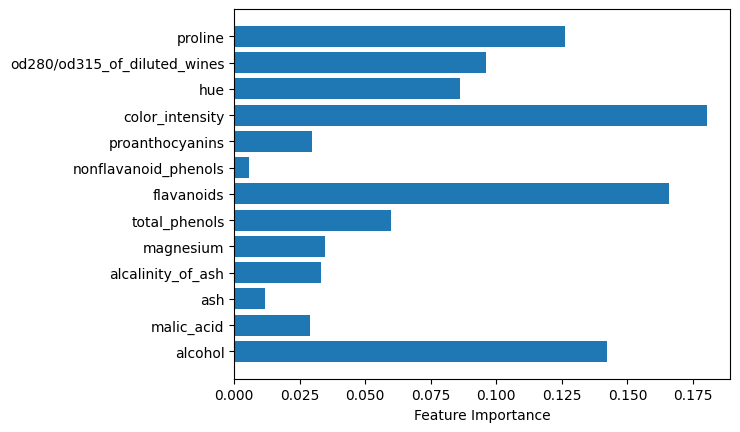

In [5]:

from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


# Extract and visualize feature importances
importances = clf.feature_importances_
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.show()


In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Load dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use RFE with SVM
svm = SVC(kernel="linear")
selector = RFE(svm, n_features_to_select=5)
selector.fit(X_train, y_train)

# Train an SVM with selected features
svm.fit(selector.transform(X_train), y_train)

# Evaluate model performance
print("Training accuracy:", svm.score(selector.transform(X_train), y_train))
print("Test accuracy:", svm.score(selector.transform(X_test), y_test))


Training accuracy: 0.9221105527638191
Test accuracy: 0.9298245614035088


In [7]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso

# Load dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Lasso for feature selection
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Train with selected features
X_train_selected = X_train[:, lasso.coef_ != 0]
X_test_selected = X_test[:, lasso.coef_ != 0]
lasso.fit(X_train_selected, y_train)

# Evaluate model
print("Training score:", lasso.score(X_train_selected, y_train))
print("Test score:", lasso.score(X_test_selected, y_test))


Training score: 0.5134138695996738
Test score: 0.4859159242547949


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.007518796992481203
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
from sklearn.svm import SVC

# Train SVM
svm = SVC()
svm.fit(X_train, y_train)

# Evaluate model
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.007518796992481203
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


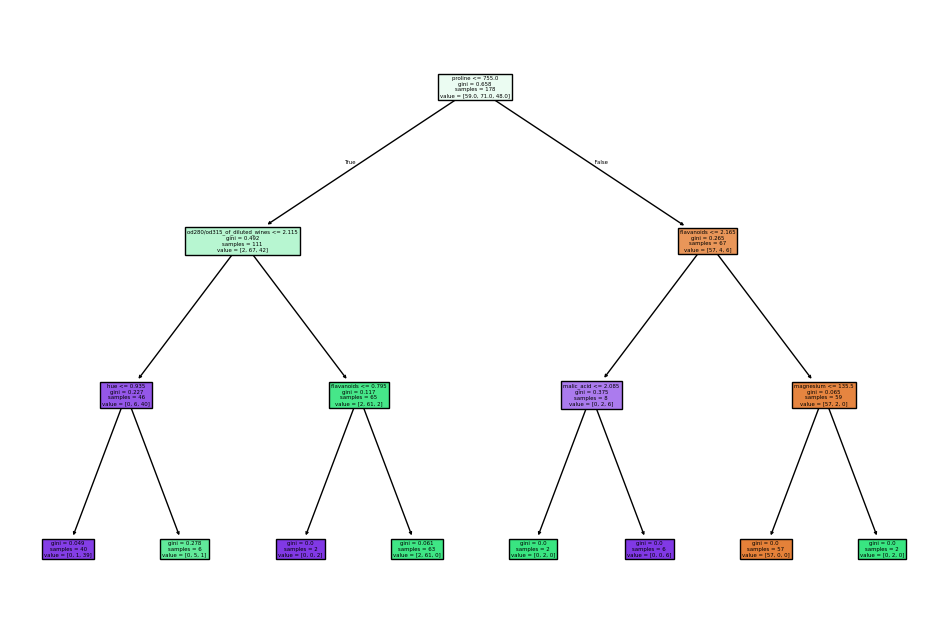

In [15]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train decision tree
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X, y)

# Visualize decision tree without class names (to avoid mismatch)
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=wine.feature_names, filled=True)
plt.show()


In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california = fetch_california_housing()

X = california.data
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.5558915986952426
R-squared: 0.5757877060324521


In [12]:
from sklearn.linear_model import Ridge

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Evaluate model
y_pred = ridge.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


MSE: 0.5558034669932194
R-squared: 0.5758549611440139


MSE: 0.6424109810265641


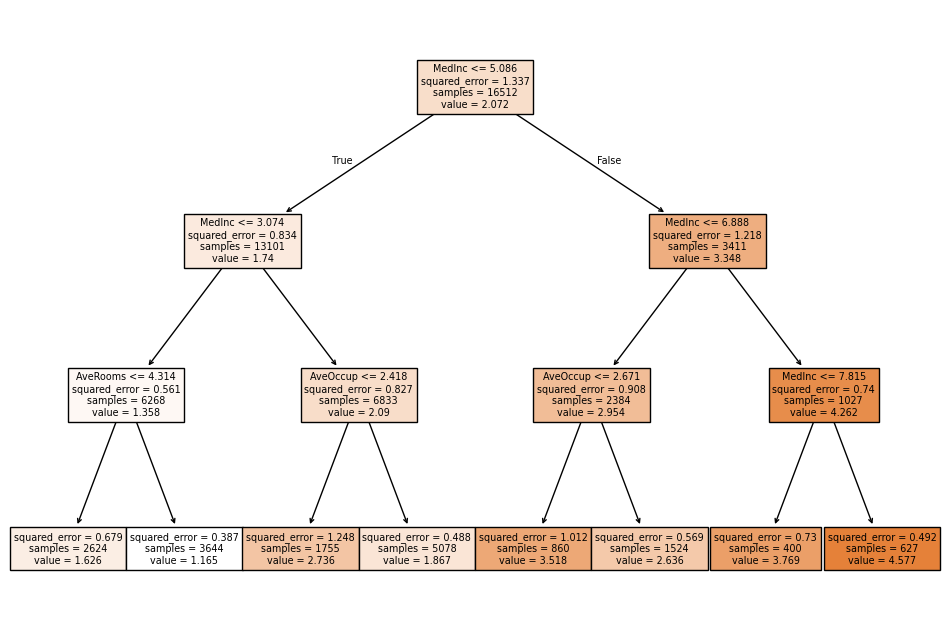

In [14]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Train Decision Tree Regressor with limited depth
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train, y_train)

# Evaluate model
y_pred = tree_reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(tree_reg, feature_names=california.feature_names, filled=True)
plt.savefig("decision_tree.png")  # Save the plot instead of showing it
